In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression


import missingno as msno

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer, KNNImputer

pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [7]:
df = pd.read_csv("data/total_imputed_updated3.csv")
df_zipcode = pd.read_csv("data/nyc-zip-codes.csv")

In [8]:
df = df.fillna(value=0)
df = df.replace(np.nan, 0)

# SPLITTING FEATURES INTO CATEGORIES

In [9]:
cols = pd.DataFrame(df.columns)

In [10]:
col_age = ['Workers16yearsandover', 
           '%16to19years',
           '%20to24years',
           '%25to44years',
           '%45to54years',
           '%55to59years',
           '%60yearsandover',
           'Medianage(years)',
          ]   

In [11]:
col_race = ['%Onerace', 
            '%White', 
            '%BlackorAfricanAmerican', 
            '%AmericanIndianandAlaskaNative', 
            '%Asian', 
            '%NativeHawaiianandOtherPacificIslander', 
            '%Someotherrace', 
            '%Twoormoreraces', 
            '%HispanicorLatinoorigin(ofanyrace)', 
            '%Whitealone,notHispanicorLatino', 
            '%Native', 
            '%Foreignborn']

In [12]:
col_citizenship = ['%NaturalizedU.S.citizen',
                   '%NotaU.S.citizen']

In [13]:
col_language = ['%SpeaklanguageotherthanEnglish',
            '%SpeakEnglish"verywell"',
            '%SpeakEnglishlessthan"verywell"']

In [14]:
col_sex = ['%Male', '%Female']

In [15]:
col_occupation = ['%Management,business,science,andartsoccupations',
                '%Serviceoccupations',
                '%Salesandofficeoccupations',
                '%Naturalresources,construction,andmaintenanceoccupations',
                '%Production,transportation,andmaterialmovingoccupations',
                '%Militaryspecificoccupations',
                '%Agriculture,forestry,fishingandhunting,andmining',
                '%Construction',
                '%Manufacturing',
                '%Wholesaletrade',
                '%Retailtrade',
                '%Transportationandwarehousing,andutilities',
                '%Informationandfinanceandinsurance,andrealestateandrentalandleasing',
                '%Professional,scientific,management,andadministrativeandwastemanagementservices',
                '%Educationalservices,andhealthcareandsocialassistance',
                '%Arts,entertainment,andrecreation,andaccommodationandfoodservices',
                '%Otherservices(exceptpublicadministration)',
                '%Publicadministration',
                '%Armedforces',
                '%Privatewageandsalaryworkers',
                '%Governmentworkers',
                '%Self-employedworkersinownnotincorporatedbusiness',
                '%Unpaidfamilyworkers']

In [16]:
col_pop = ['population', 'density']

In [17]:
col_worker = ['%employed',
            '%Workers16yearsandoverwithearnings',
           'Workers16yearsandover.1',
            '%Workedinstateofresidence',
            '%Workedincountyofresidence',
            '%Workedoutsidecountyofresidence',
            '%Workedoutsidestateofresidence',
            'Workers16yearsandoverwhodidnotworkfromhome',]

In [18]:
col_timeToWork = ['%12:00a.m.to4:59a.m.',
                    '%5:00a.m.to5:29a.m.',
                    '%5:30a.m.to5:59a.m.',
                    '%6:00a.m.to6:29a.m.',
                    '%6:30a.m.to6:59a.m.',
                    '%7:00a.m.to7:29a.m.',
                    '%7:30a.m.to7:59a.m.',
                    '%8:00a.m.to8:29a.m.',
                    '%8:30a.m.to8:59a.m.',
                    '%9:00a.m.to11:59p.m.',
                    '%Timeofdeparturetogotowork']

In [19]:
col_commuteTime = ['%Lessthan10minutes',
                    '%10to14minutes',
                    '%15to19minutes',
                    '%20to24minutes',
                    '%25to29minutes',
                    '%30to34minutes',
                    '%35to44minutes',
                    '%45to59minutes',
                    '%60ormoreminutes',
                    'Meantraveltimetowork(minutes)',
                    '%Meansoftransportationtowork',
                    '%Traveltimetowork']

In [20]:
col_housing = ['rent','%Owner-occupiedhousingunits',
                '%Renter-occupiedhousingunits']

In [21]:
col_vehicle = ['%Novehicleavailable',
                '%1vehicleavailable',
                '%2vehiclesavailable',
                '%3ormorevehiclesavailable',
                '%Vehiclesavailable']

In [22]:
col_income = ['%$1to$9,999orloss',
            '%$10,000to$14,999',
            '%$15,000to$24,999',
            '%$25,000to$34,999',
            '%$35,000to$49,999',
            '%$50,000to$64,999',
            '%$65,000to$74,999',
            '%$75,000ormore',
            'Medianearnings(dollars)',
             'income']

In [23]:
col_poverty = ['Workers16yearsandoverforwhompovertystatusisdetermined',
                '%Below100percentofthepovertylevel',
                '%100to149percentofthepovertylevel',
                '%Atorabove150percentofthepovertylevel']

In [24]:
col_household = ['Workers16yearsandoverinhouseholds',
                 'householdSize',
                '%family_marriedCouple',
                '%family_children',
                'All_Household',
                'Families',
                'Families_with_children',
                'Families_without_children']

In [25]:
col_college = ['%college']

In [26]:
col_park = ['park_counts', 'park_acres']

In [27]:
col_dog = ['counts', 'weight', 'height']

In [28]:
cols = [ col_age, col_race, col_citizenship, col_language, 
        col_sex, col_occupation, col_pop, col_worker, col_timeToWork,
        col_commuteTime, col_housing, col_vehicle, col_income,
        col_poverty, col_household, col_college, col_park ] 

# DIAGRAM

In [29]:
df_zipcode['ZipCode'] = df_zipcode['ZipCode'].astype(int)
df['ZipCode'] = df['ZipCode'].astype(int)

In [30]:
df_new = pd.merge(df, df_zipcode, on='ZipCode')

In [31]:
df_new.head()

,ZipCode,counts,Workers16yearsandover,%16to19years,%20to24years,%25to44years,%45to54years,%55to59years,%60yearsandover,Medianage(years),%Male,%Female,%Onerace,%White,%BlackorAfricanAmerican,%AmericanIndianandAlaskaNative,%Asian,%NativeHawaiianandOtherPacificIslander,%Someotherrace,%Twoormoreraces,%HispanicorLatinoorigin(ofanyrace),"%Whitealone,notHispanicorLatino",%Native,%Foreignborn,%NaturalizedU.S.citizen,...,%3ormorevehiclesavailable,%Meansoftransportationtowork,%Timeofdeparturetogotowork,%Traveltimetowork,%Vehiclesavailable,rent,income,%college,%employed,all household,%family_marriedCouple,%family_children,All_Household,Families,Families_with_children,Families_without_children,population,density,weight,height,park_counts,park_acres,householdSize,Borough,Neighborhood
0,10001,1705,15725.0,0.011,0.074,0.578,0.182,0.056,0.098,36.3,0.528,0.472,0.949,0.671,0.054,0.000,0.194,0.004,0.026,0.051,0.121,0.605,0.709,0.291,0.162,...,0.002,0.106,0.174,0.139,0.017,2126.073,91733.852,0.068,0.721,13548.0,0.721,0.213,92840.0,122776.0,106452.0,132545.0,21102.0,33959.0,33.727,14.970,7.0,14.117,1.734,Manhattan,Chelsea and Clinton
1,10002,2057,31781.0,0.006,0.084,0.541,0.195,0.074,0.100,39.1,0.511,0.489,0.944,0.398,0.065,0.006,0.400,0.000,0.075,0.056,0.202,0.321,0.607,0.393,0.203,...,0.009,0.194,0.256,0.229,0.025,992.176,37159.062,0.086,0.523,33601.0,0.602,0.111,36982.0,40045.0,42054.0,38639.0,81410.0,92573.0,29.423,13.860,28.0,90.192,2.142,Manhattan,Lower East Side
2,10003,2542,32555.0,0.037,0.086,0.573,0.113,0.056,0.136,34.3,0.504,0.496,0.969,0.773,0.024,0.001,0.146,0.001,0.024,0.031,0.073,0.735,0.808,0.192,0.081,...,0.008,0.151,0.243,0.191,0.006,2378.657,118801.115,0.058,0.656,25113.0,0.895,0.225,118161.0,183787.0,250001.0,153480.0,56024.0,97188.0,37.455,15.493,12.0,13.488,1.678,Manhattan,Lower East Side
3,10004,270,2539.0,0.004,0.028,0.553,0.139,0.102,0.174,38.3,0.540,0.460,0.961,0.692,0.057,0.000,0.207,0.005,0.000,0.039,0.062,0.677,0.791,0.209,0.056,...,0.014,0.094,0.221,0.068,0.013,3371.607,187819.598,0.022,0.809,1827.0,0.929,0.292,190223.0,205202.0,244000.0,204130.0,3089.0,5519.0,34.522,14.590,3.0,23.624,1.792,Manhattan,Lower Manhattan
4,10005,687,7037.0,0.011,0.128,0.707,0.098,0.041,0.016,31.1,0.497,0.503,0.963,0.738,0.023,0.000,0.188,0.000,0.014,0.037,0.056,0.705,0.805,0.195,0.076,...,0.000,0.105,0.196,0.160,0.033,3385.291,195127.366,0.011,0.929,4425.0,0.892,0.391,189702.0,241094.0,250001.0,202042.0,7135.0,97048.0,37.249,15.579,1.0,0.117,2.048,Manhattan,Lower Manhattan


### 3.1 DOG COUNT + NEIGHBORHOOD

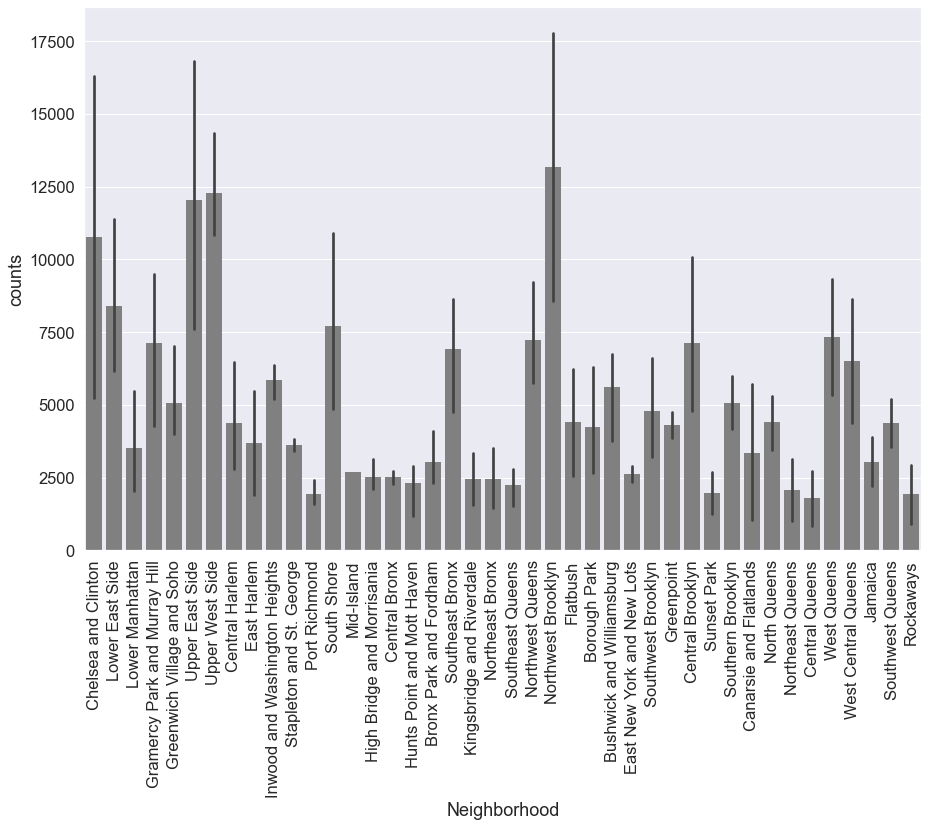

In [33]:
fig = plt.figure()
fig.set_size_inches(15,10)
sns.set(font_scale=1.5)
sns.barplot(x = df_new['Neighborhood'], y = df_new['counts'], edgecolor='none', color='grey',errwidth=None, estimator=sum)
plt.tick_params(axis="x", labelrotation=90)
fig.savefig('export/EDA/count_neighborhood.png', dpi=300)

### 3.2 DOG COUNT + BOROUGH

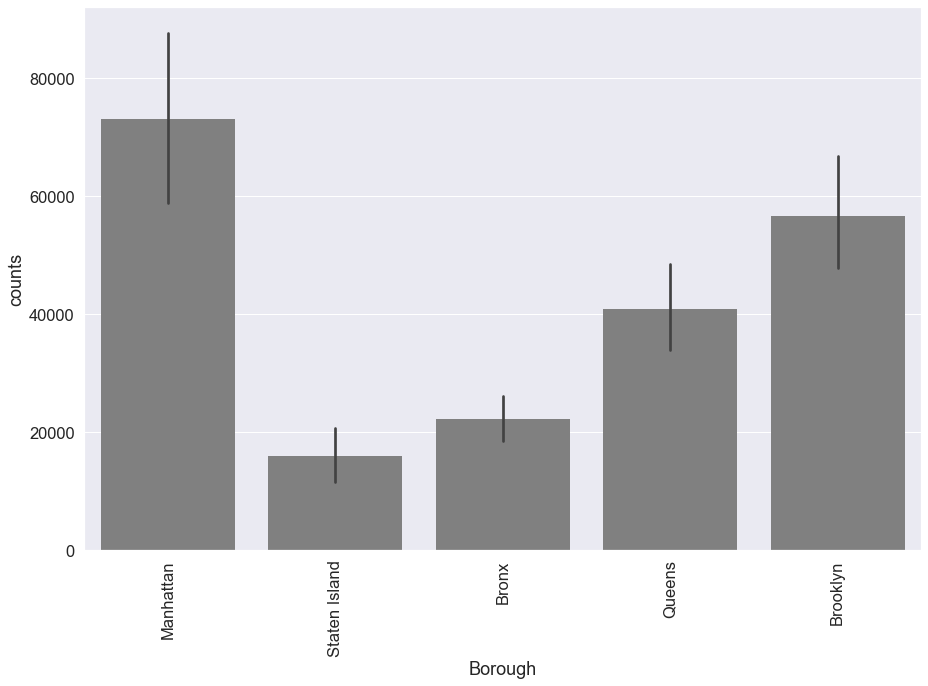

In [34]:
fig = plt.figure()
fig.set_size_inches(15,10)
sns.barplot(x = df_new['Borough'], y = df_new['counts'], edgecolor='none', color='grey',errwidth=None, estimator=sum)
plt.tick_params(axis="x", labelrotation=90)
fig.savefig('export/EDA/count_borough.png', dpi=300)

### 3.3 POPULATION + BOROUGH

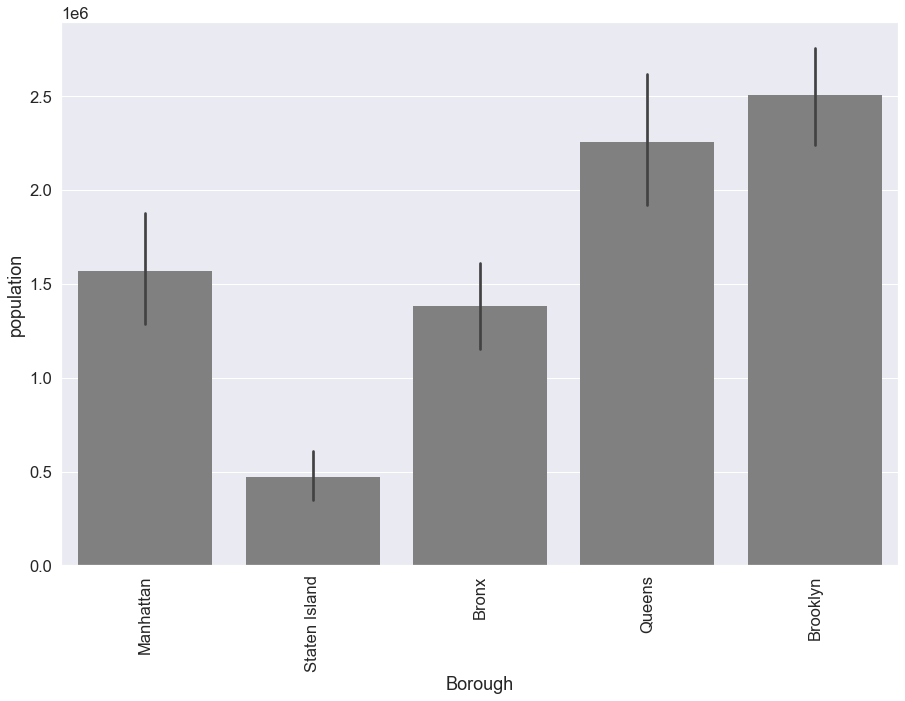

In [35]:
fig = plt.figure()
fig.set_size_inches(15,10)
sns.barplot(x = df_new['Borough'], y = df_new['population'], edgecolor='none', color='grey',errwidth=None, estimator=sum)
plt.tick_params(axis="x", labelrotation=90)
fig.savefig('export/EDA/population_borough.png', dpi=300)

### 3.4 POPULATION DENSITY + BOROUGH

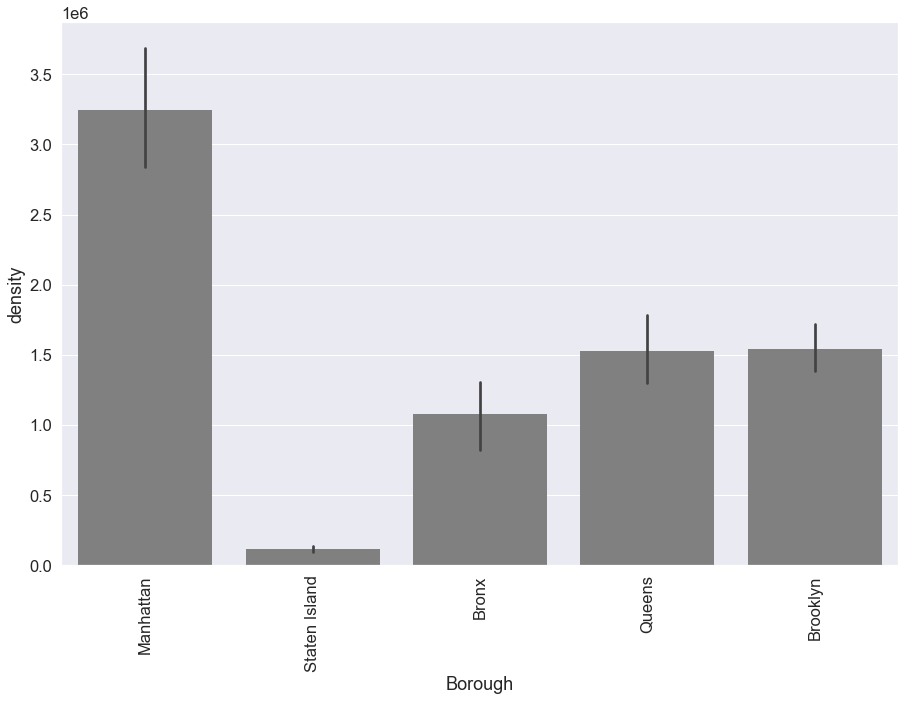

In [36]:
fig = plt.figure()
fig.set_size_inches(15,10)

sns.barplot(x = df_new['Borough'], y = df_new['density'], edgecolor='none', color='grey',errwidth=None, estimator=sum)
plt.tick_params(axis="x", labelrotation=90)
fig.savefig('export/EDA/populationDensity_borough.png', dpi=300)

### 3.5 INCOME + BOROUGH

In [39]:
df_new['income'] = df_new['income'].astype(int)

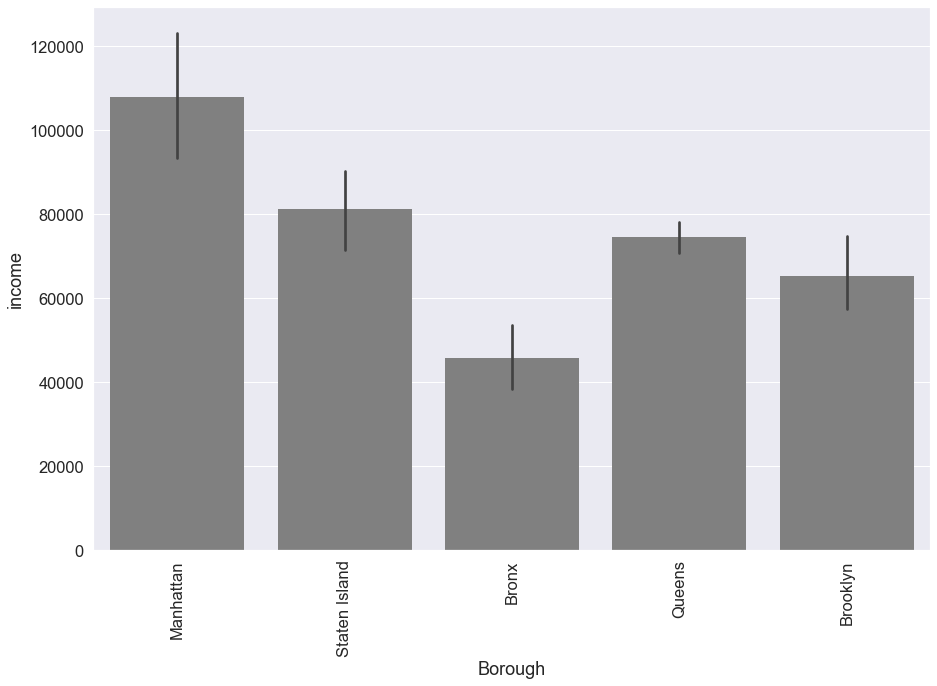

In [40]:
fig = plt.figure()
fig.set_size_inches(15,10)

sns.barplot(x = df_new['Borough'], y = df_new['income'], edgecolor='none', color='grey',errwidth=None)
plt.tick_params(axis="x", labelrotation=90)
fig.savefig('export/EDA/income_borough.png', dpi=300)

### 3.6 MEAN TRAVEL TIME TO WORK + BOROUGH

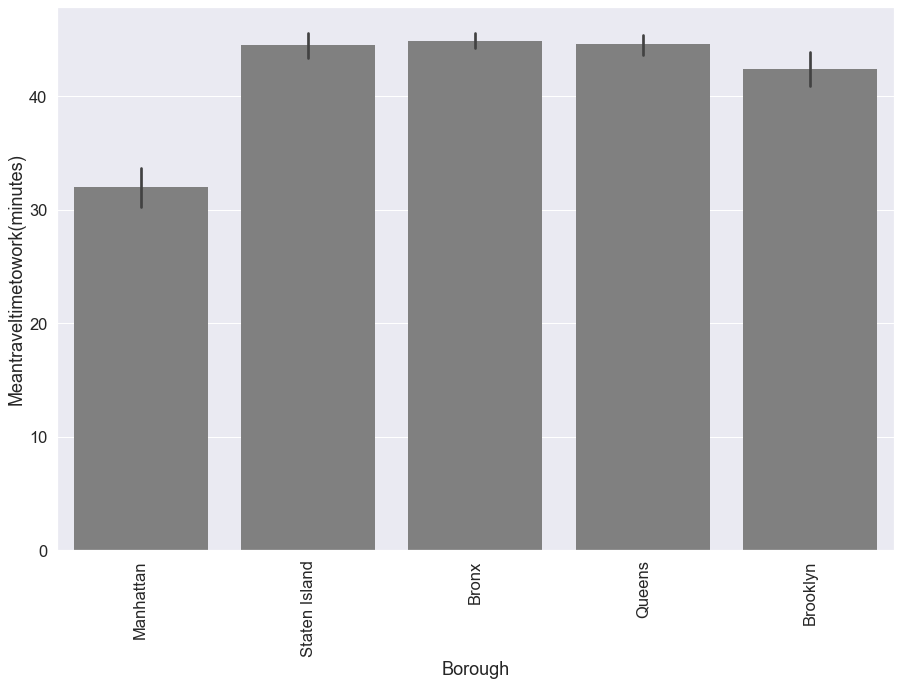

In [41]:
fig = plt.figure()
fig.set_size_inches(15,10)

sns.barplot(x = df_new['Borough'], y = df_new['Meantraveltimetowork(minutes)'], edgecolor='none', color='grey',errwidth=None)
plt.tick_params(axis="x", labelrotation=90)
fig.savefig('export/EDA/commute_Borough.png', dpi=300)

### 3.7 BOROUGH MEAN

In [42]:
df_new_borough_mean = df_new.groupby(by="Borough").mean()
df_new_borough_mean

,ZipCode,counts,Workers16yearsandover,%16to19years,%20to24years,%25to44years,%45to54years,%55to59years,%60yearsandover,Medianage(years),%Male,%Female,%Onerace,%White,%BlackorAfricanAmerican,%AmericanIndianandAlaskaNative,%Asian,%NativeHawaiianandOtherPacificIslander,%Someotherrace,%Twoormoreraces,%HispanicorLatinoorigin(ofanyrace),"%Whitealone,notHispanicorLatino",%Native,%Foreignborn,%NaturalizedU.S.citizen,...,%1vehicleavailable,%2vehiclesavailable,%3ormorevehiclesavailable,%Meansoftransportationtowork,%Timeofdeparturetogotowork,%Traveltimetowork,%Vehiclesavailable,rent,income,%college,%employed,all household,%family_marriedCouple,%family_children,All_Household,Families,Families_with_children,Families_without_children,population,density,weight,height,park_counts,park_acres,householdSize
Borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronx,10463.000,889.760,23029.200,0.019,0.092,0.489,0.211,0.087,0.102,40.568,0.498,0.502,0.931,0.249,0.333,0.005,0.038,1.720e-03,0.305,0.069,0.538,0.128,0.554,0.446,0.237,...,0.359,0.141,0.061,0.170,0.269,0.228,0.021,1227.810,45692.480,0.168,0.601,20713.680,0.443,0.192,45315.360,54877.160,49847.800,61384.520,55299.200,43097.640,27.097,13.011,17.560,1149.914,2.730
Brooklyn,11220.297,1531.784,31920.973,0.011,0.072,0.534,0.188,0.085,0.110,39.919,0.495,0.505,0.956,0.458,0.291,0.004,0.121,4.865e-04,0.081,0.044,0.177,0.395,0.575,0.425,0.259,...,0.384,0.114,0.034,0.185,0.309,0.256,0.032,1507.703,65375.919,0.125,0.639,26247.676,0.627,0.273,64717.865,75832.486,76030.378,77319.892,67694.595,41710.865,31.163,13.993,17.622,363.910,2.646
Manhattan,10032.302,1700.465,20177.775,0.008,0.068,0.565,0.173,0.068,0.117,38.139,0.503,0.497,0.954,0.614,0.121,0.003,0.140,7.132e-04,0.075,0.046,0.184,0.545,0.691,0.309,0.150,...,0.222,0.034,0.008,0.131,0.231,0.180,0.015,2134.557,107961.907,0.086,0.691,17620.814,0.722,0.257,106807.256,151805.612,164550.101,143005.403,36547.171,75487.031,34.560,14.923,10.209,153.119,2.026
Queens,11381.683,682.717,18129.544,0.014,0.065,0.466,0.216,0.106,0.133,42.994,0.520,0.480,0.948,0.375,0.195,0.005,0.249,6.222e-04,0.124,0.052,0.240,0.278,0.480,0.520,0.328,...,0.373,0.267,0.136,0.177,0.301,0.249,0.020,1618.786,74595.250,0.150,0.631,13006.683,0.689,0.263,73915.328,84452.700,82013.556,86472.039,37582.411,25506.383,30.793,13.435,8.733,362.706,2.875
Staten Island,10306.750,1333.250,17761.417,0.022,0.076,0.442,0.225,0.102,0.134,43.308,0.528,0.472,0.969,0.715,0.117,0.003,0.089,1.667e-04,0.044,0.031,0.189,0.599,0.705,0.295,0.198,...,0.276,0.393,0.246,0.155,0.338,0.207,0.016,1342.780,81192.833,0.163,0.579,13874.167,0.736,0.326,81059.333,98285.250,92371.750,100996.250,39060.833,9763.917,33.981,14.194,15.250,1142.560,2.835


In [43]:
df_new_borough_mean['Meantraveltimetowork(minutes)']

Borough
Bronx            44.899
Brooklyn         42.459
Manhattan        31.981
Queens           44.606
Staten Island    44.567
Name: Meantraveltimetowork(minutes), dtype: float64

In [44]:
df_new_borough_mean['income']

Borough
Bronx             45692.480
Brooklyn          65375.919
Manhattan        107961.907
Queens            74595.250
Staten Island     81192.833
Name: income, dtype: float64

### 3.8 BOROUGH SUM

In [45]:
df_new_borough_sum = df_new.groupby(by="Borough").sum()
df_new_borough_sum

,ZipCode,counts,Workers16yearsandover,%16to19years,%20to24years,%25to44years,%45to54years,%55to59years,%60yearsandover,Medianage(years),%Male,%Female,%Onerace,%White,%BlackorAfricanAmerican,%AmericanIndianandAlaskaNative,%Asian,%NativeHawaiianandOtherPacificIslander,%Someotherrace,%Twoormoreraces,%HispanicorLatinoorigin(ofanyrace),"%Whitealone,notHispanicorLatino",%Native,%Foreignborn,%NaturalizedU.S.citizen,...,%1vehicleavailable,%2vehiclesavailable,%3ormorevehiclesavailable,%Meansoftransportationtowork,%Timeofdeparturetogotowork,%Traveltimetowork,%Vehiclesavailable,rent,income,%college,%employed,all household,%family_marriedCouple,%family_children,All_Household,Families,Families_with_children,Families_without_children,population,density,weight,height,park_counts,park_acres,householdSize
Borough,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronx,261575,22244,5.757e+05,0.468,2.297,12.225,5.286,2.170,2.554,1014.200,12.461,12.539,23.280,6.219,8.322,0.128,0.956,0.043,7.621,1.720,13.458,3.195,13.844,11.156,5.935,...,8.982,3.524,1.522,4.261,6.722,5.698,0.517,30695.256,1142312,4.203,15.014,517842.0,11.073,4.810,1.133e+06,1.372e+06,1.246e+06,1.535e+06,1.382e+06,1.077e+06,677.435,325.286,439.0,28747.850,68.246
Brooklyn,415151,56676,1.181e+06,0.420,2.646,19.770,6.948,3.146,4.072,1477.000,18.307,18.693,35.388,16.942,10.784,0.145,4.490,0.018,3.005,1.612,6.550,14.633,21.261,15.739,9.577,...,14.214,4.203,1.259,6.830,11.421,9.462,1.202,55785.001,2418909,4.609,23.650,971164.0,23.214,10.090,2.395e+06,2.806e+06,2.813e+06,2.861e+06,2.505e+06,1.543e+06,1153.048,517.746,652.0,13464.669,97.894
Manhattan,431389,73120,8.676e+05,0.338,2.931,24.310,7.450,2.936,5.040,1639.967,21.645,21.355,41.003,26.400,5.206,0.120,6.011,0.031,3.239,1.997,7.908,23.456,29.720,13.280,6.434,...,9.557,1.446,0.347,5.650,9.926,7.733,0.664,91785.945,4642362,3.701,29.723,757695.0,31.052,11.032,4.593e+06,6.528e+06,7.076e+06,6.149e+06,1.572e+06,3.246e+06,1486.097,641.677,439.0,6584.114,87.128
Queens,682901,40963,1.088e+06,0.816,3.908,27.930,12.956,6.379,8.006,2579.633,31.210,28.790,56.889,22.488,11.725,0.272,14.945,0.037,7.424,3.111,14.428,16.693,28.776,31.224,19.652,...,22.393,15.992,8.182,10.628,18.050,14.931,1.180,97127.175,4475715,9.010,37.836,780401.0,41.311,15.764,4.435e+06,5.067e+06,4.921e+06,5.188e+06,2.255e+06,1.530e+06,1847.602,806.125,524.0,21762.340,172.495
Staten Island,123681,15999,2.131e+05,0.258,0.908,5.302,2.698,1.229,1.605,519.700,6.338,5.662,11.623,8.581,1.408,0.030,1.071,0.002,0.526,0.377,2.262,7.183,8.464,3.536,2.372,...,3.308,4.712,2.955,1.858,4.056,2.480,0.193,16113.356,974314,1.962,6.952,166490.0,8.836,3.907,9.727e+05,1.179e+06,1.108e+06,1.212e+06,4.687e+05,1.172e+05,407.767,170.328,183.0,13710.718,34.017


In [46]:
df_new_borough_sum['population']

Borough
Bronx            1.382e+06
Brooklyn         2.505e+06
Manhattan        1.572e+06
Queens           2.255e+06
Staten Island    4.687e+05
Name: population, dtype: float64

In [47]:
df_new_borough_sum['counts']

Borough
Bronx            22244
Brooklyn         56676
Manhattan        73120
Queens           40963
Staten Island    15999
Name: counts, dtype: int64

# VISUALIZE CORRELATION

### 3.9 CORRELATION MATRIX

In [48]:
def get_variable_name(variable):
    globals_dict = globals()

    return [var_name for var_name in globals_dict if globals_dict[var_name] is variable]

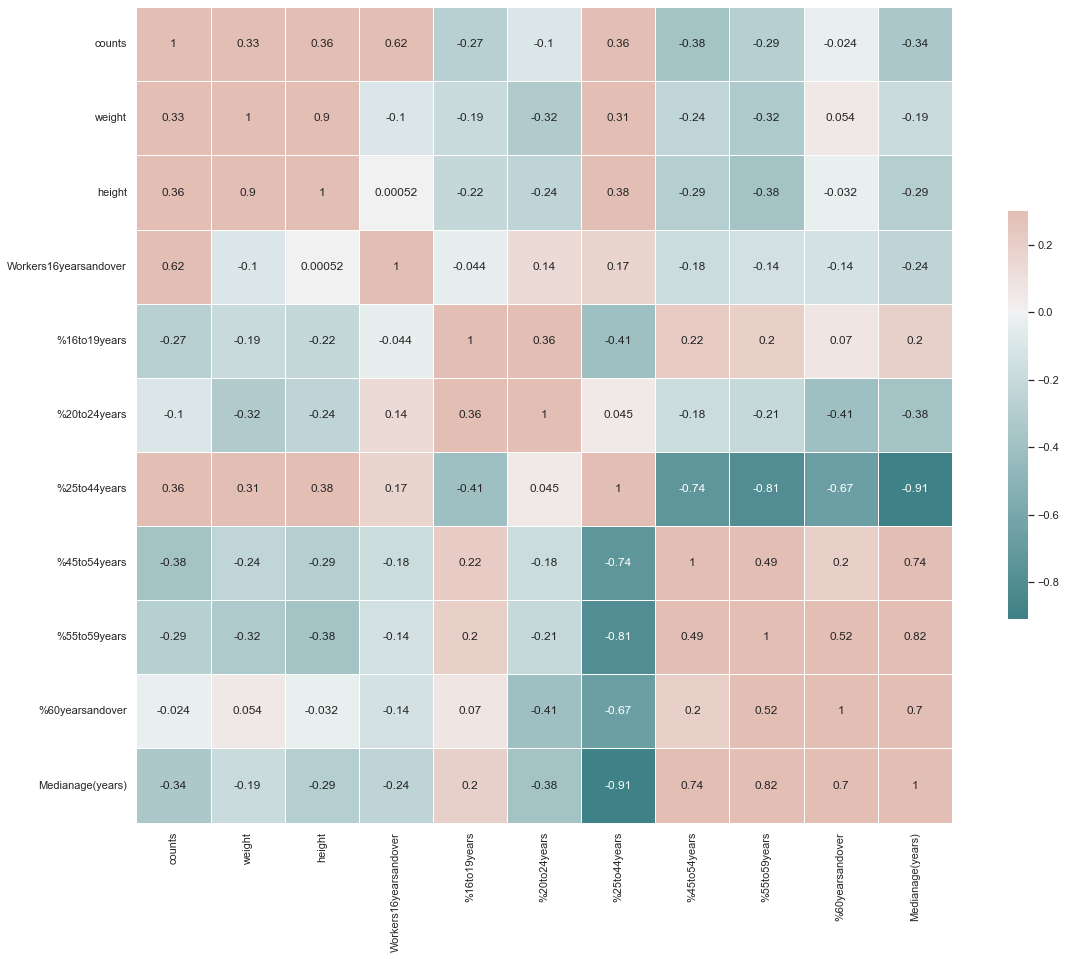

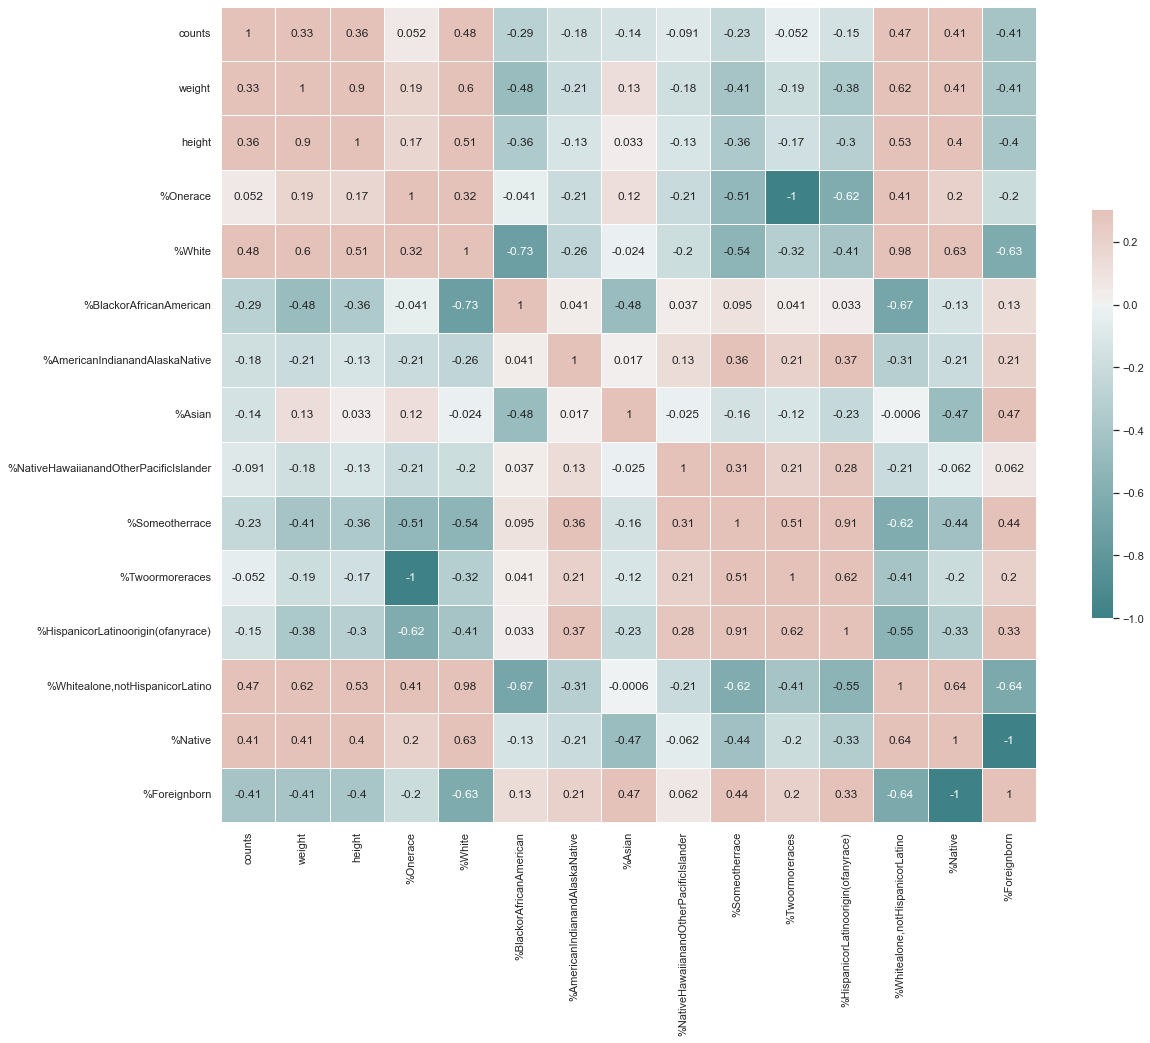

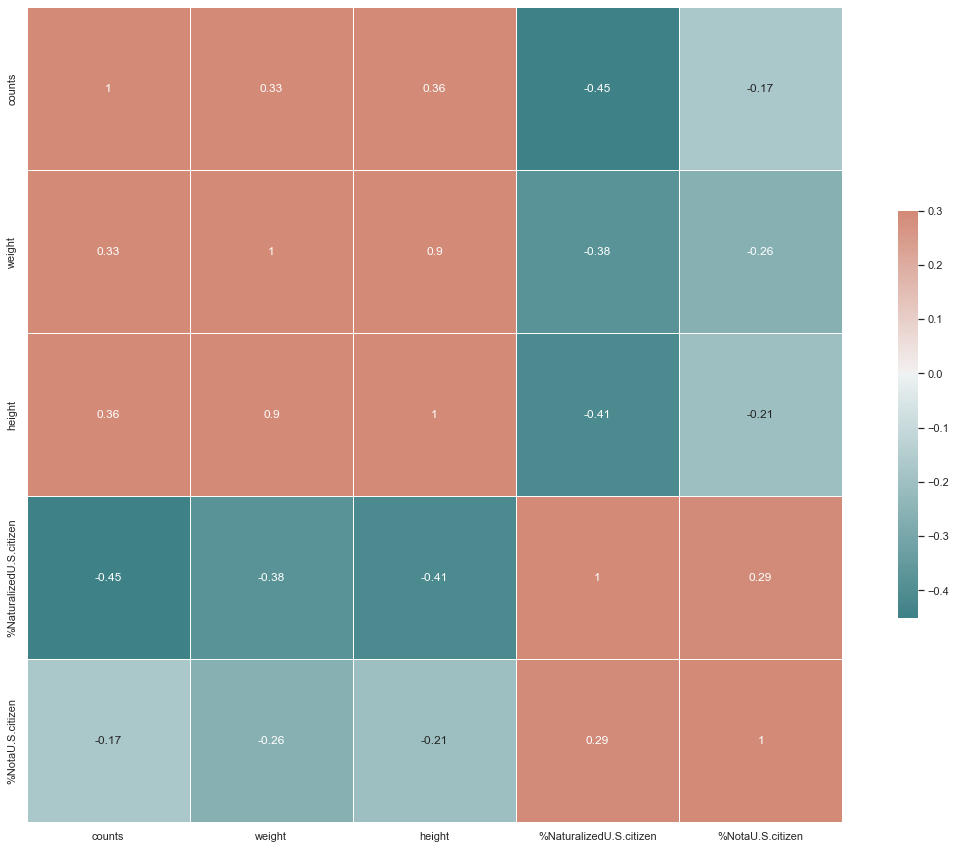

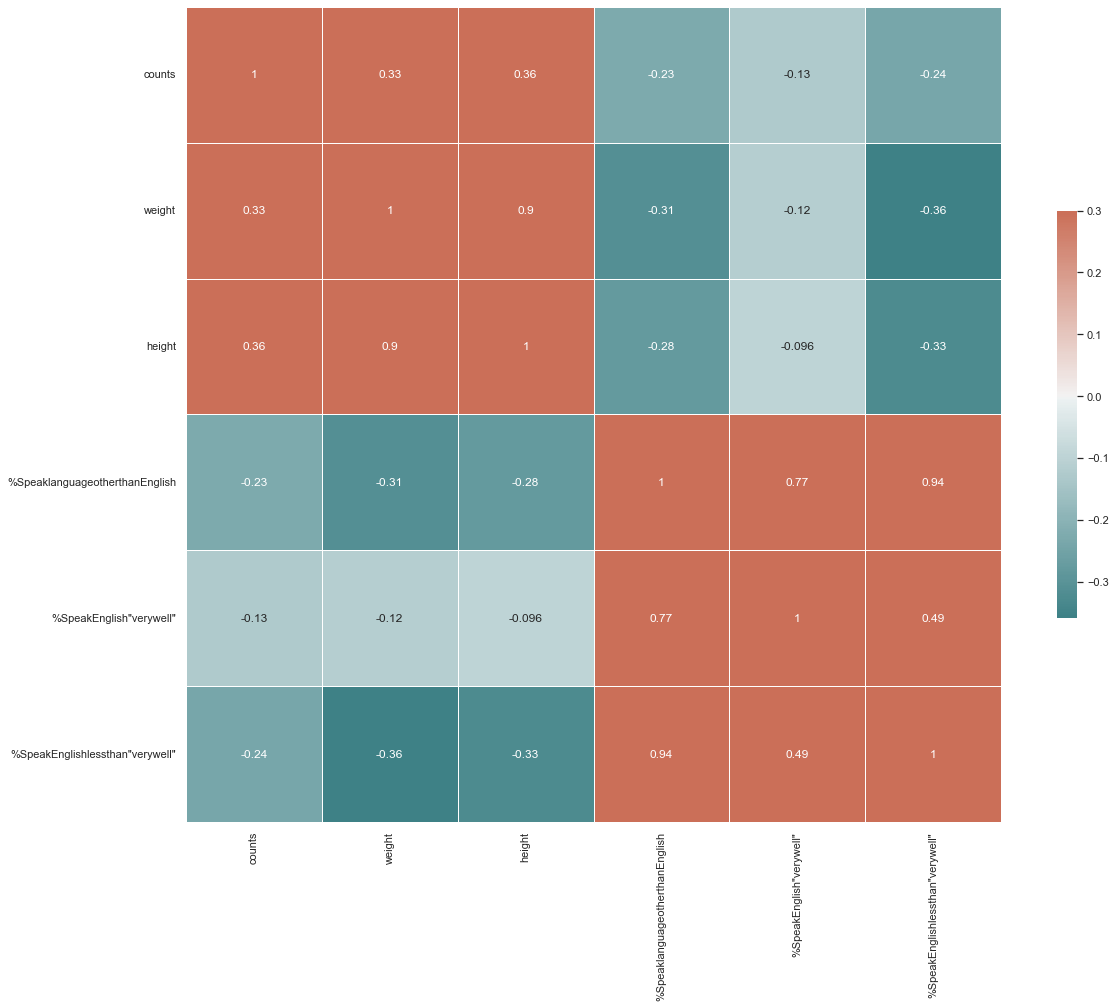

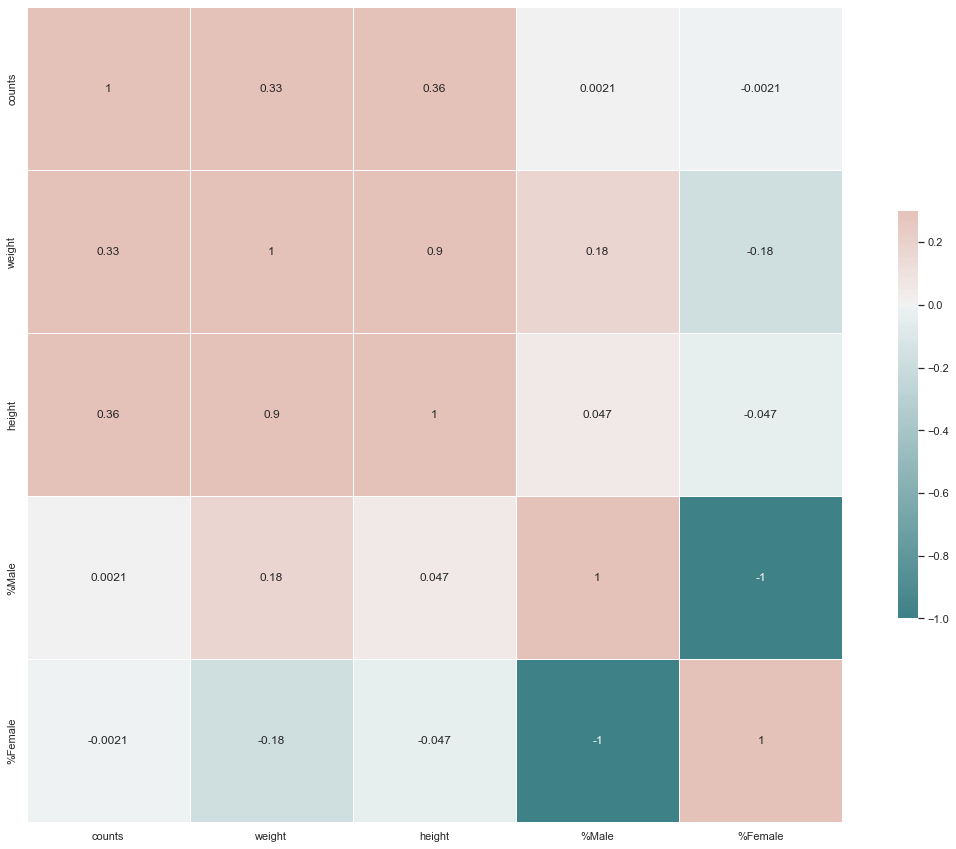

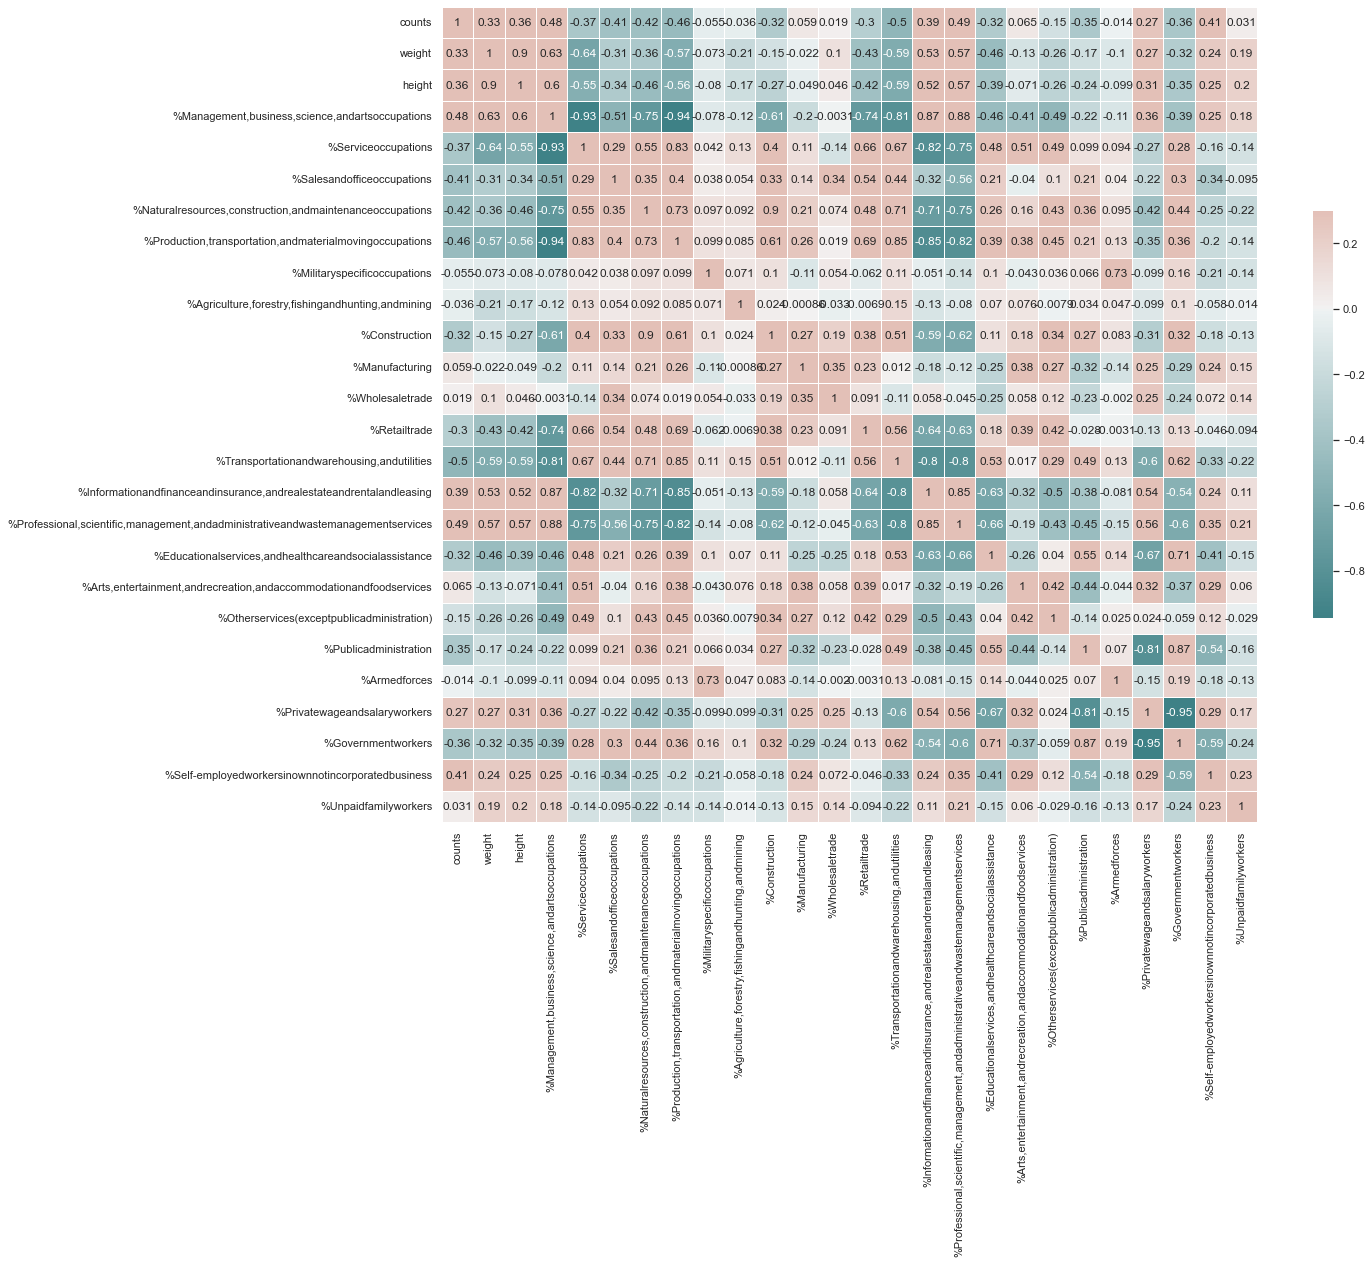

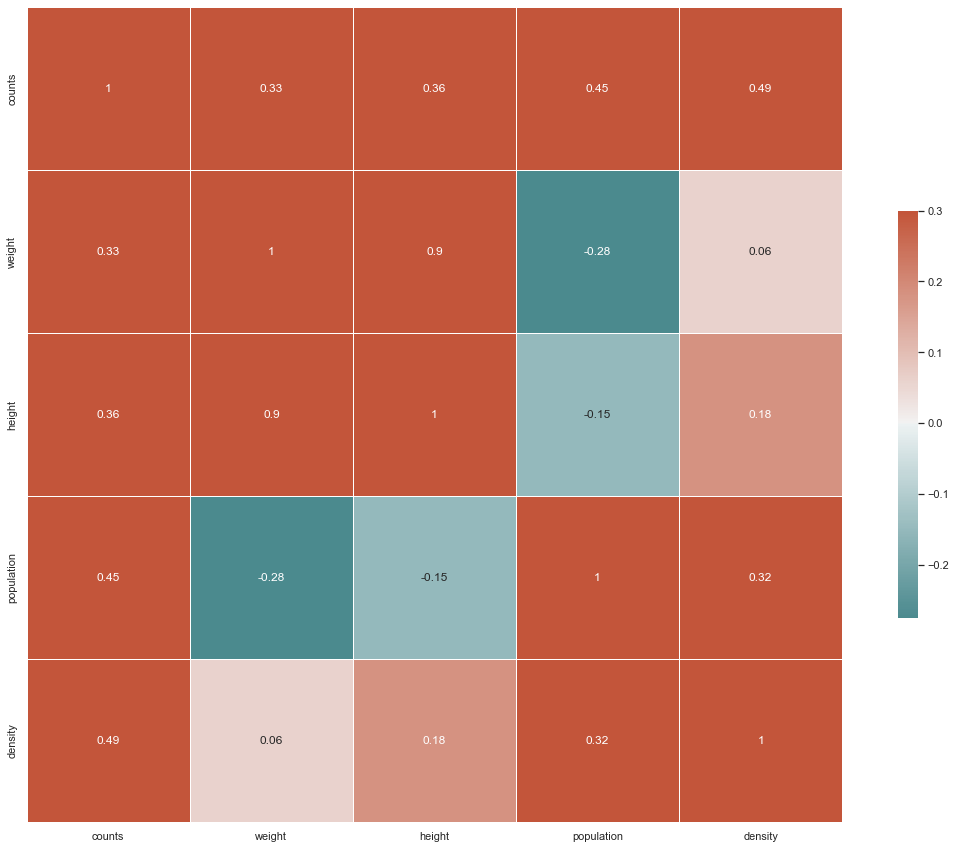

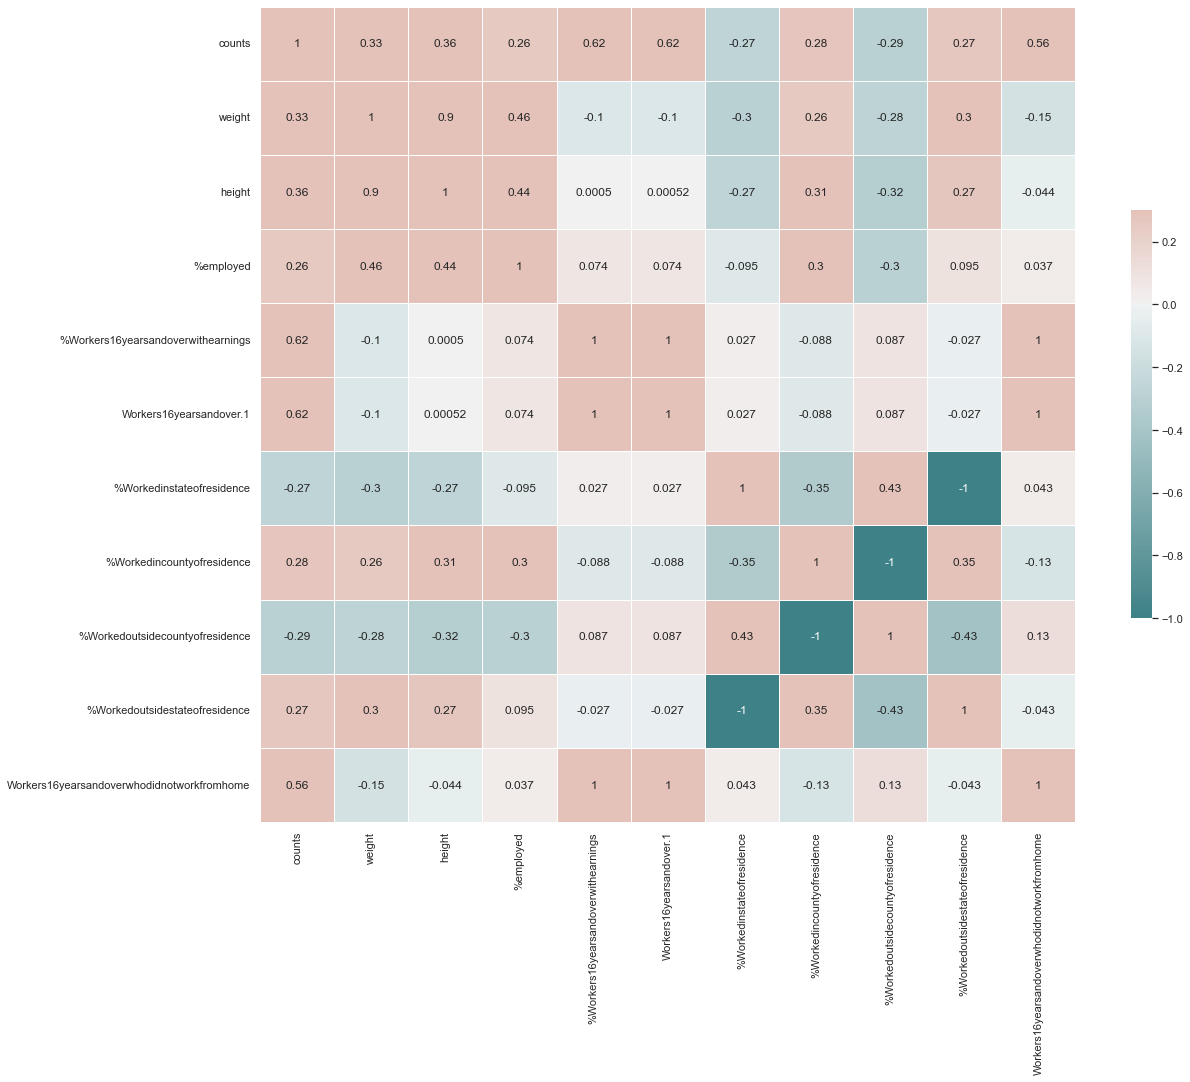

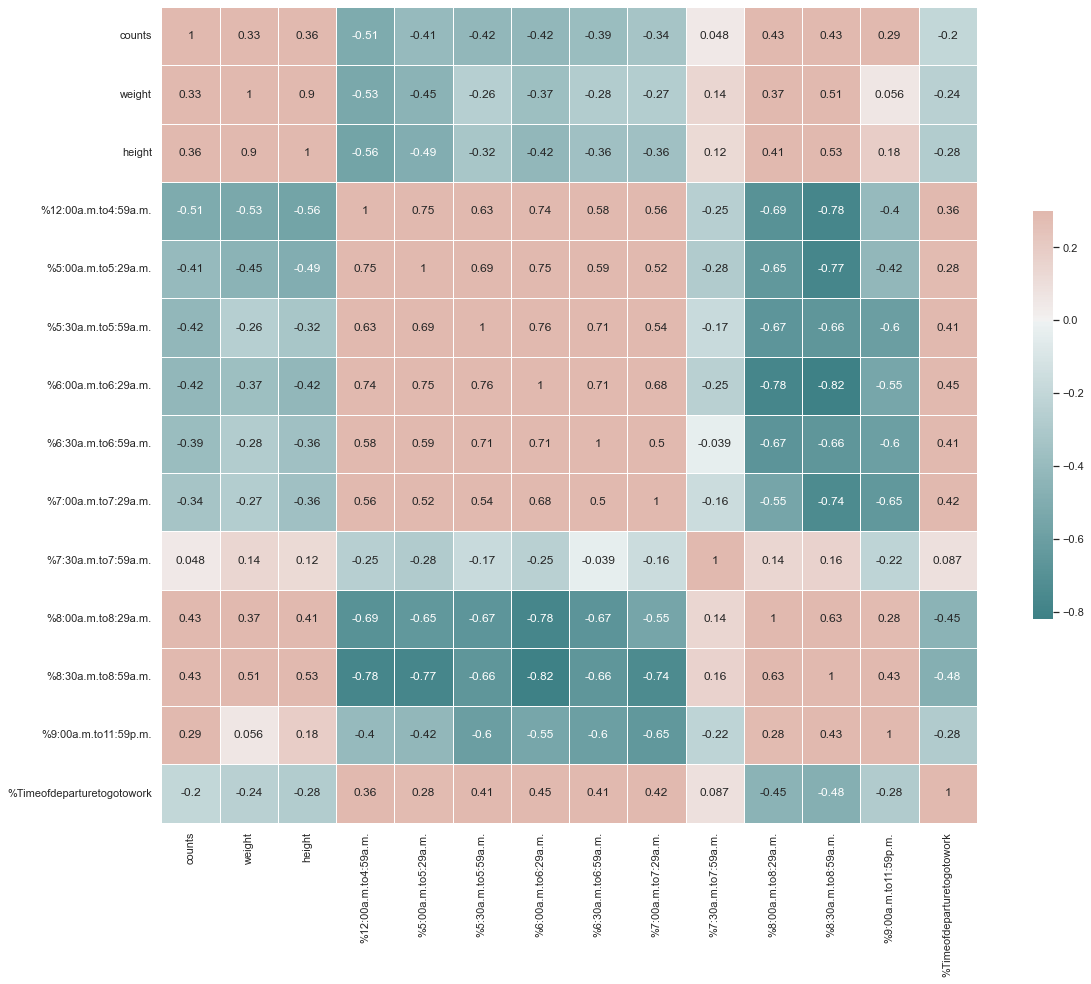

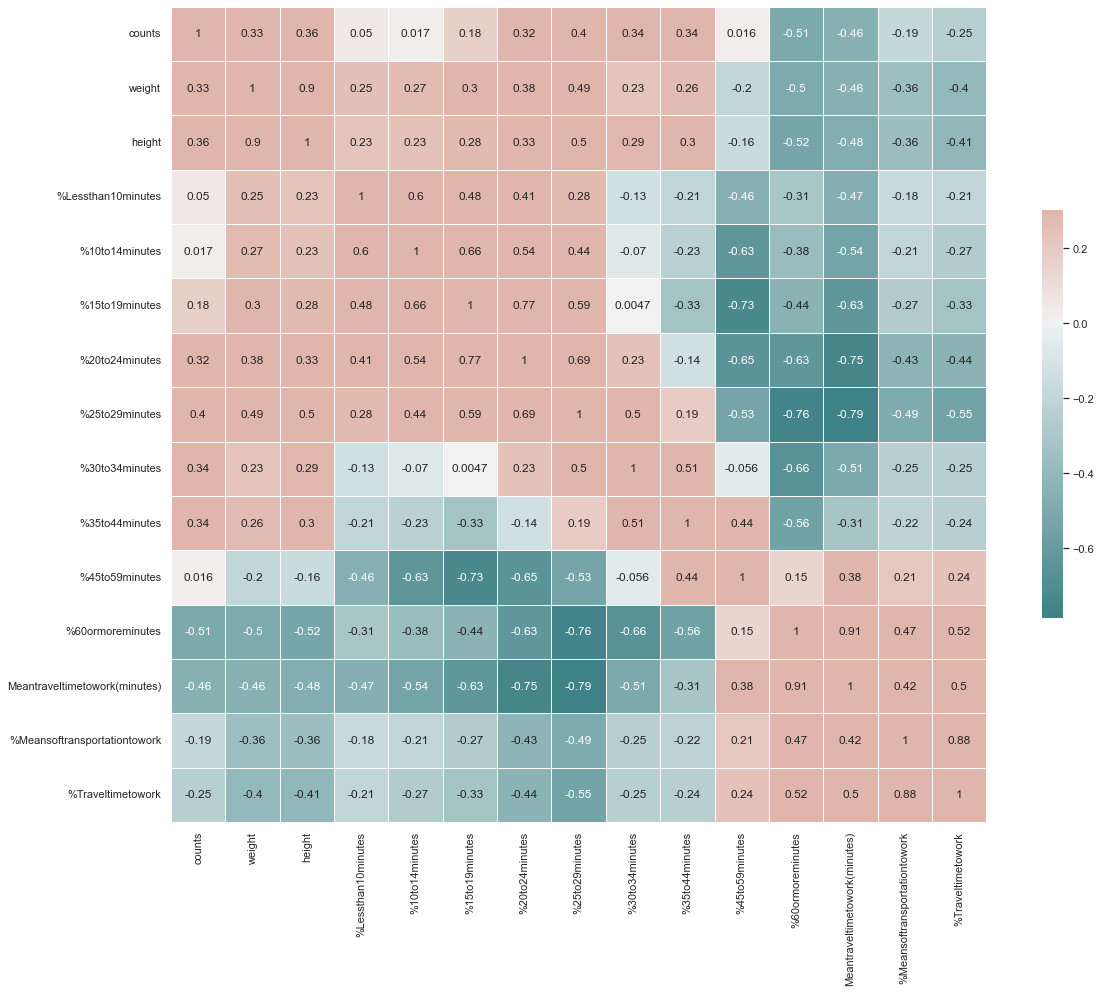

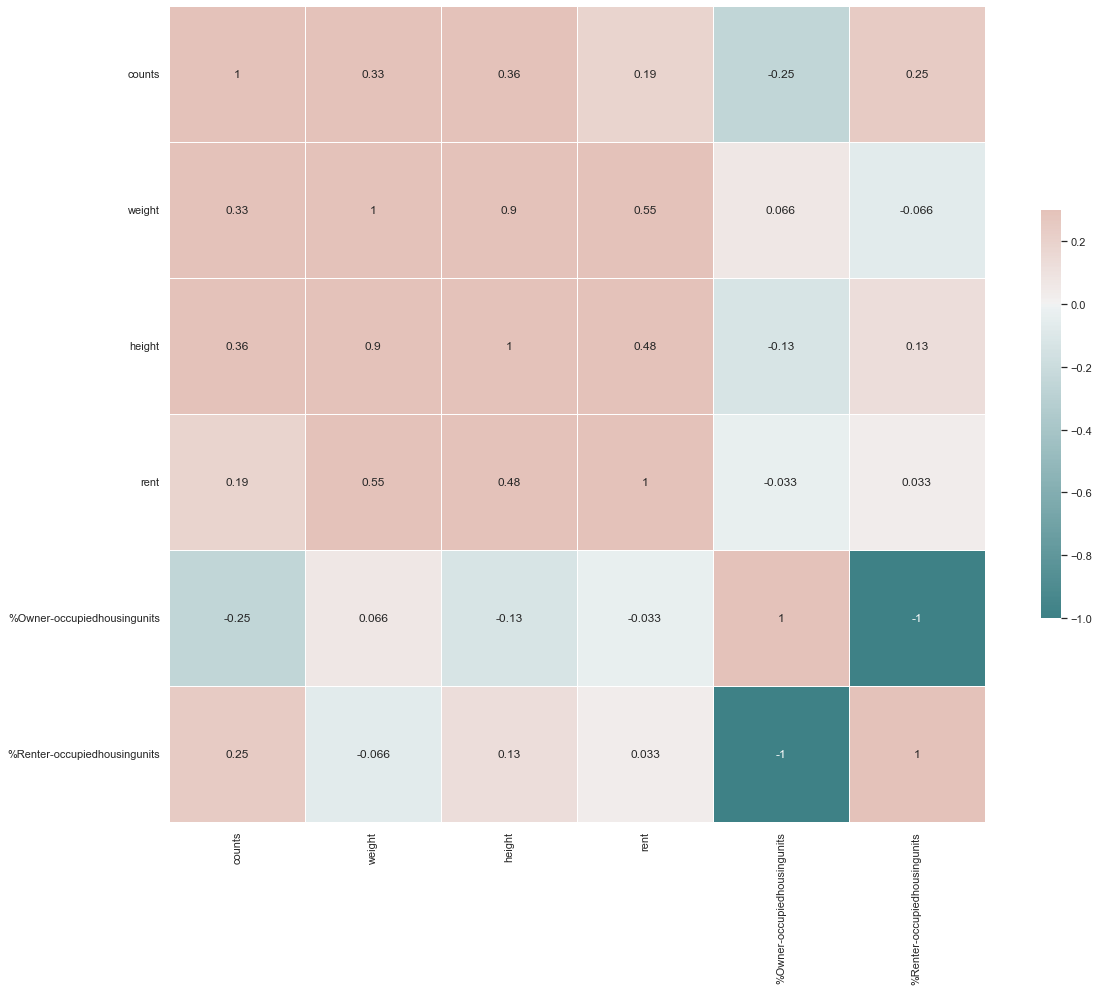

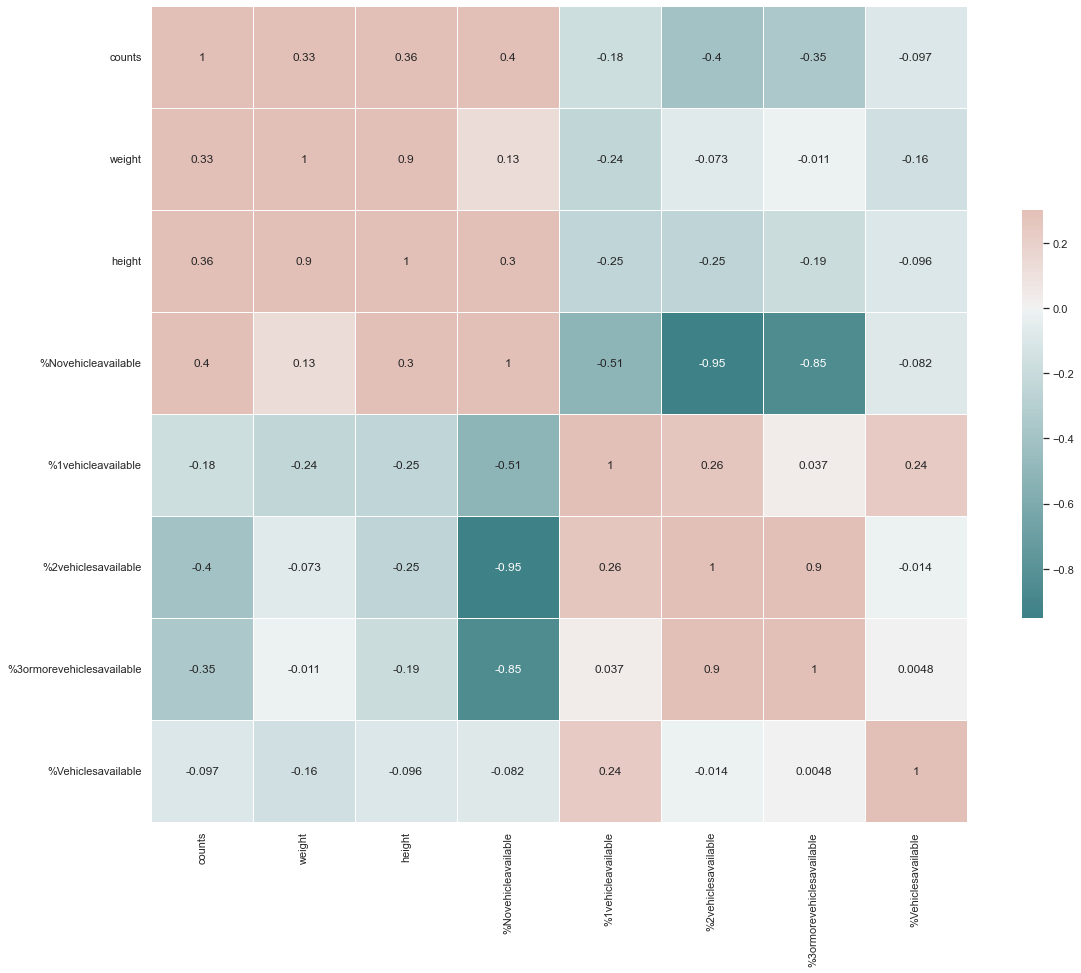

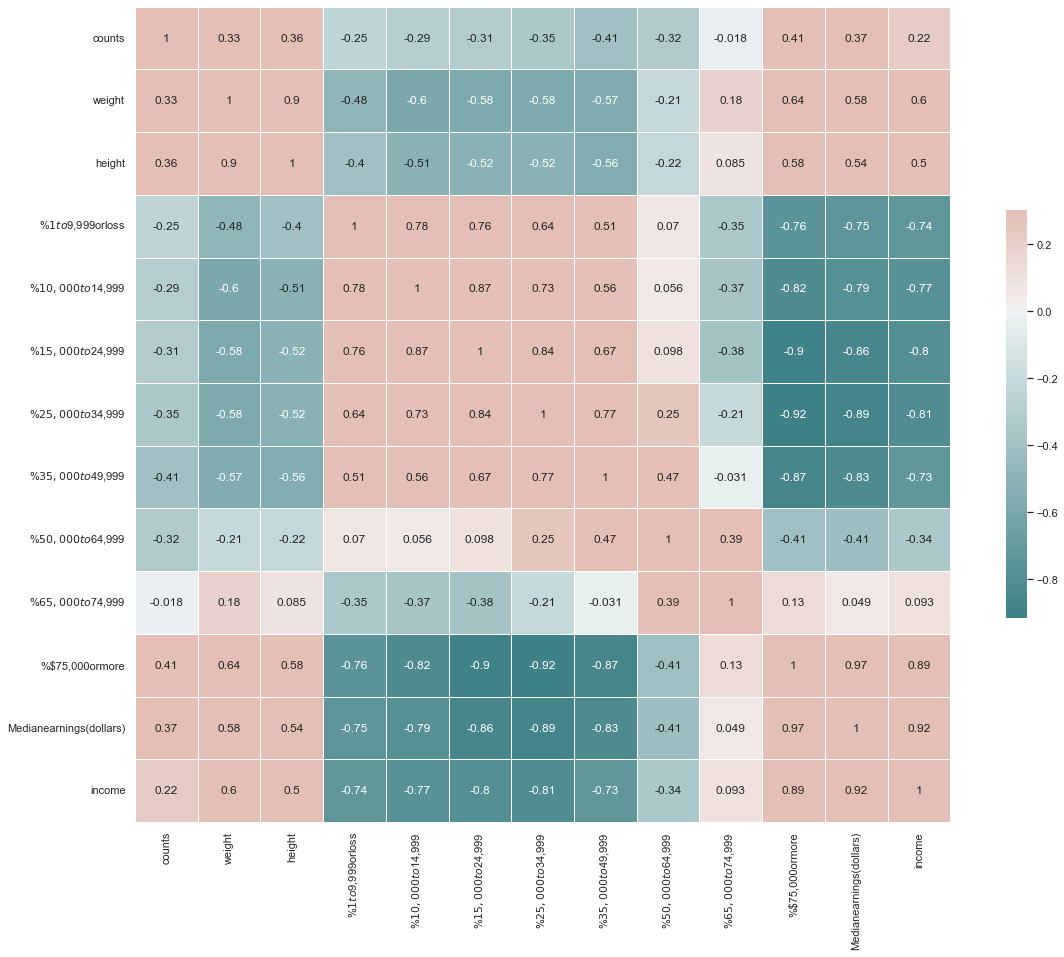

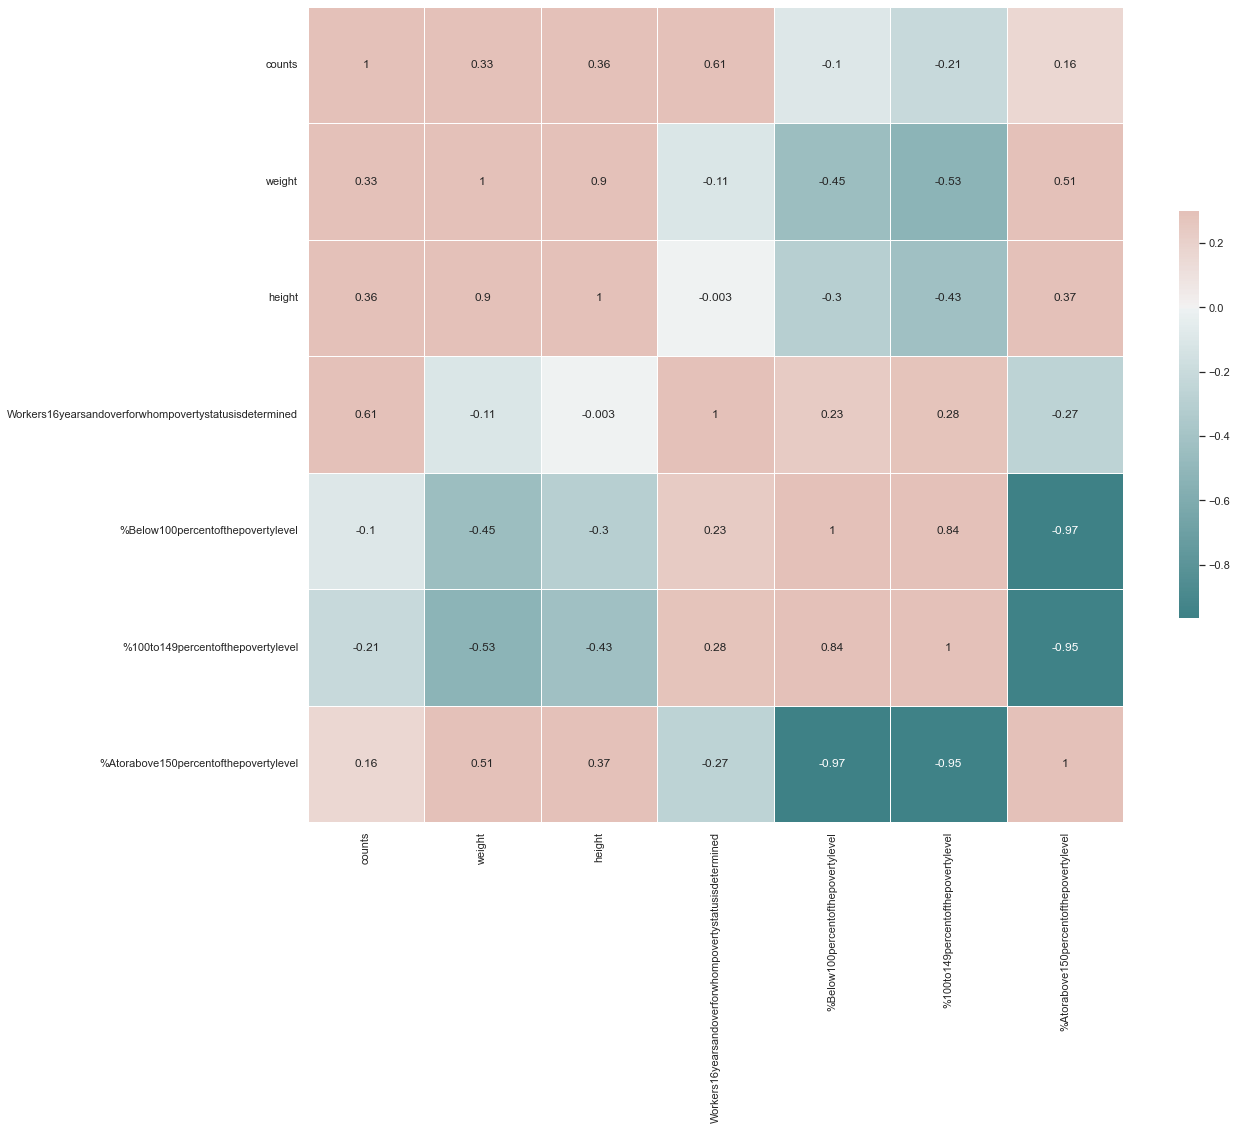

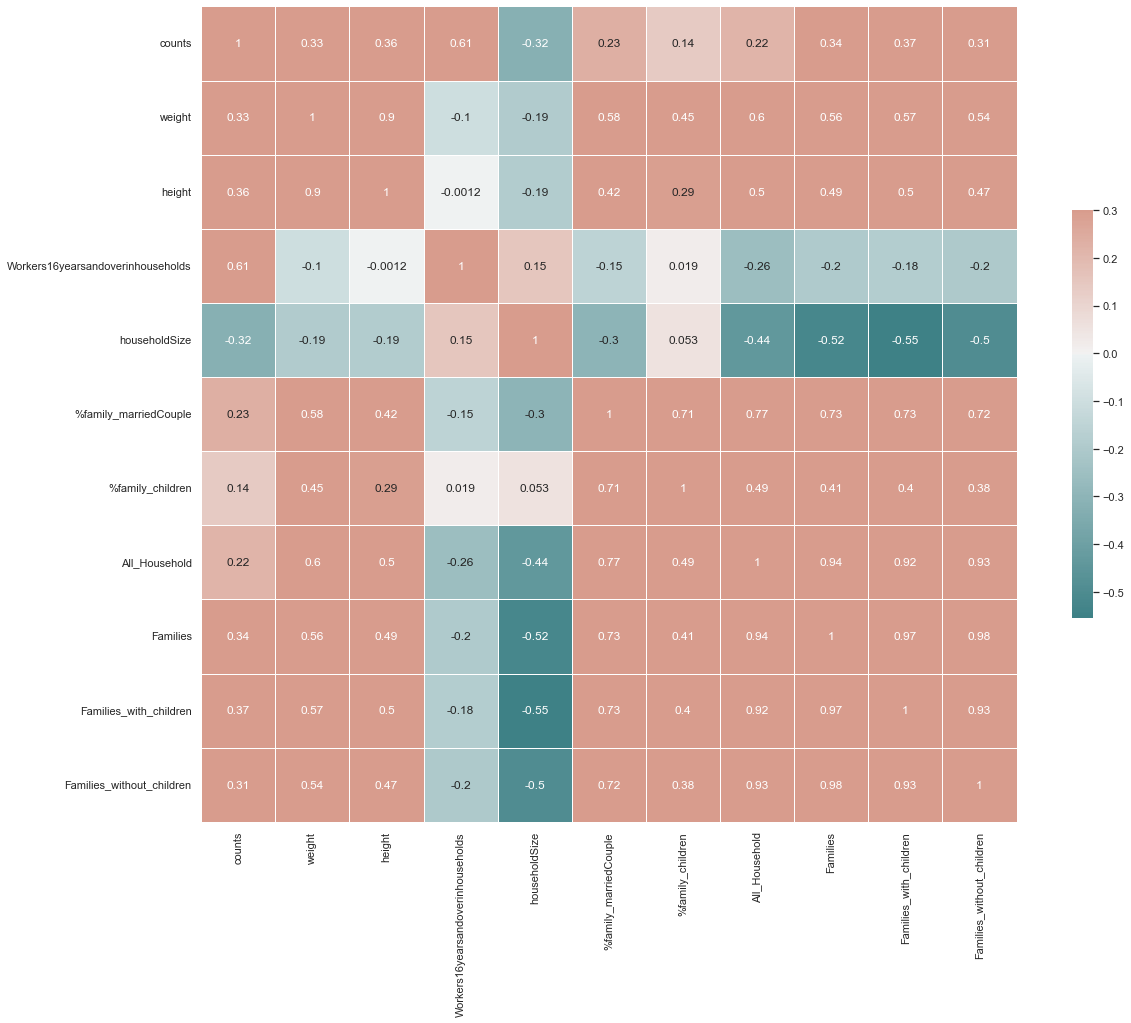

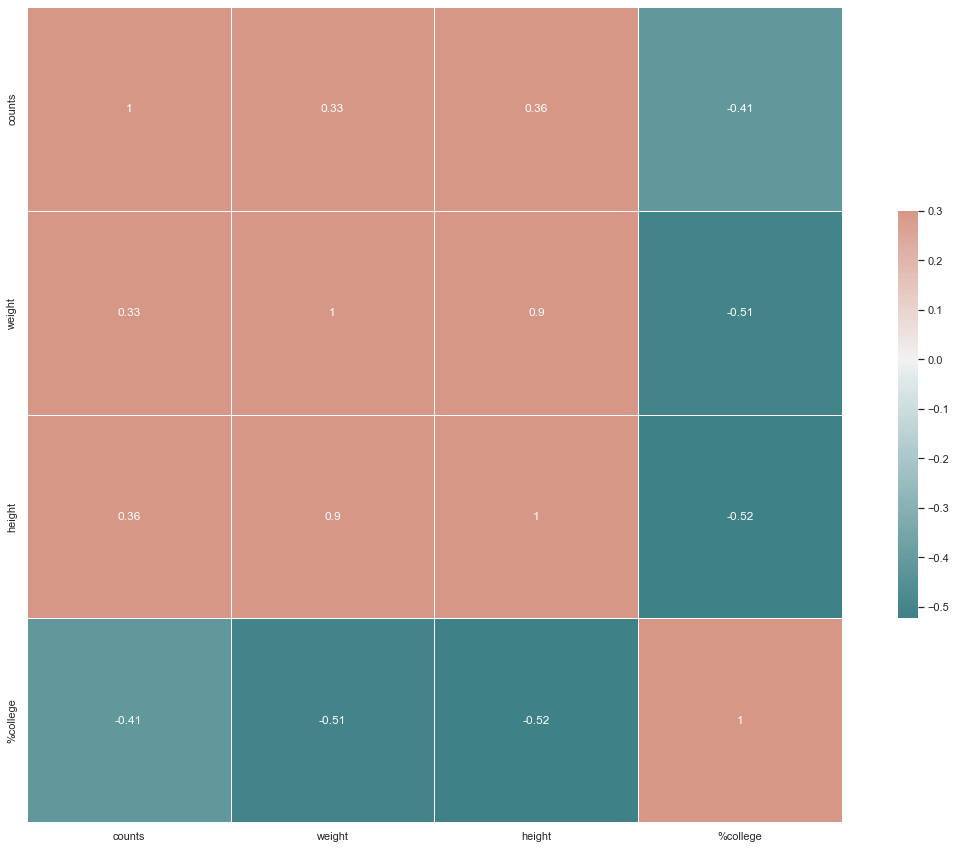

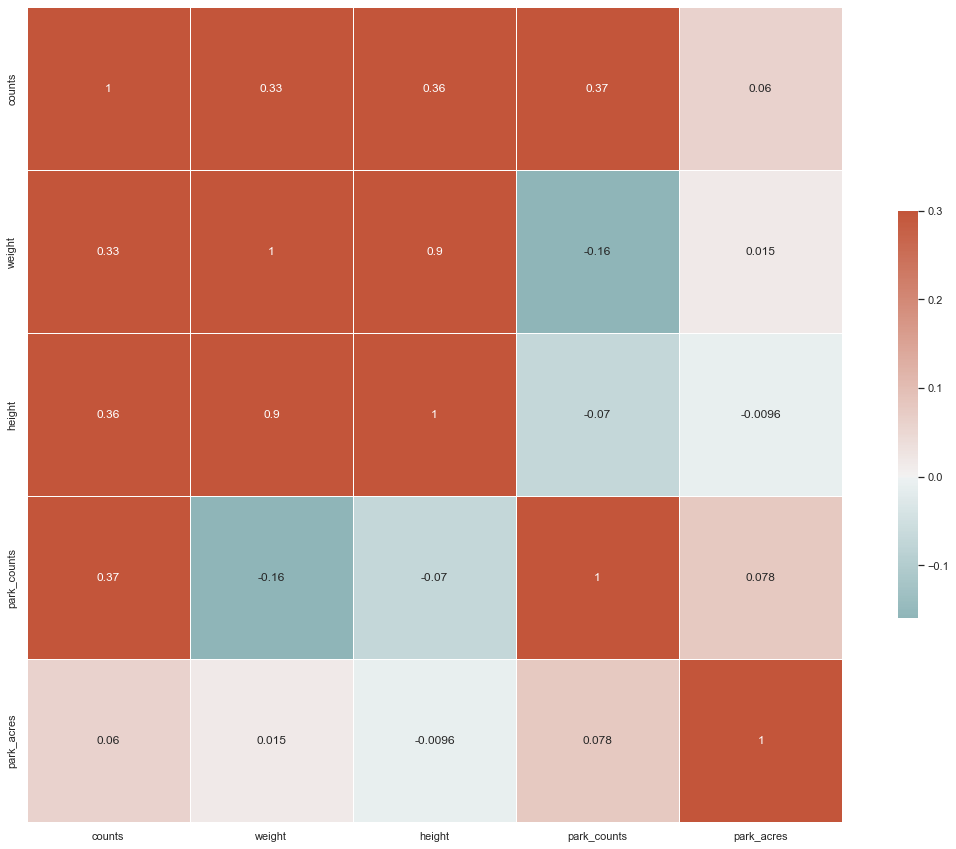

In [50]:
for i in range(len(cols)):
    cols_update = col_dog + cols[i]
    col_name = str(get_variable_name(cols[i])[0])
    df_sel = df[cols_update]
        
    corr = df_sel.corr()
    f, ax = plt.subplots(figsize=(20, 15))
    sns.set(font_scale=1)
    cmap = sns.diverging_palette(200, 20, as_cmap=True)
    sns.heatmap(corr, vmax=.3, center=0, cmap=cmap,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    
    f.savefig('export/correlation/correlation_' + col_name +'.png', dpi=300)
    

# BREED

### 3.10 Breed counts within zipcode

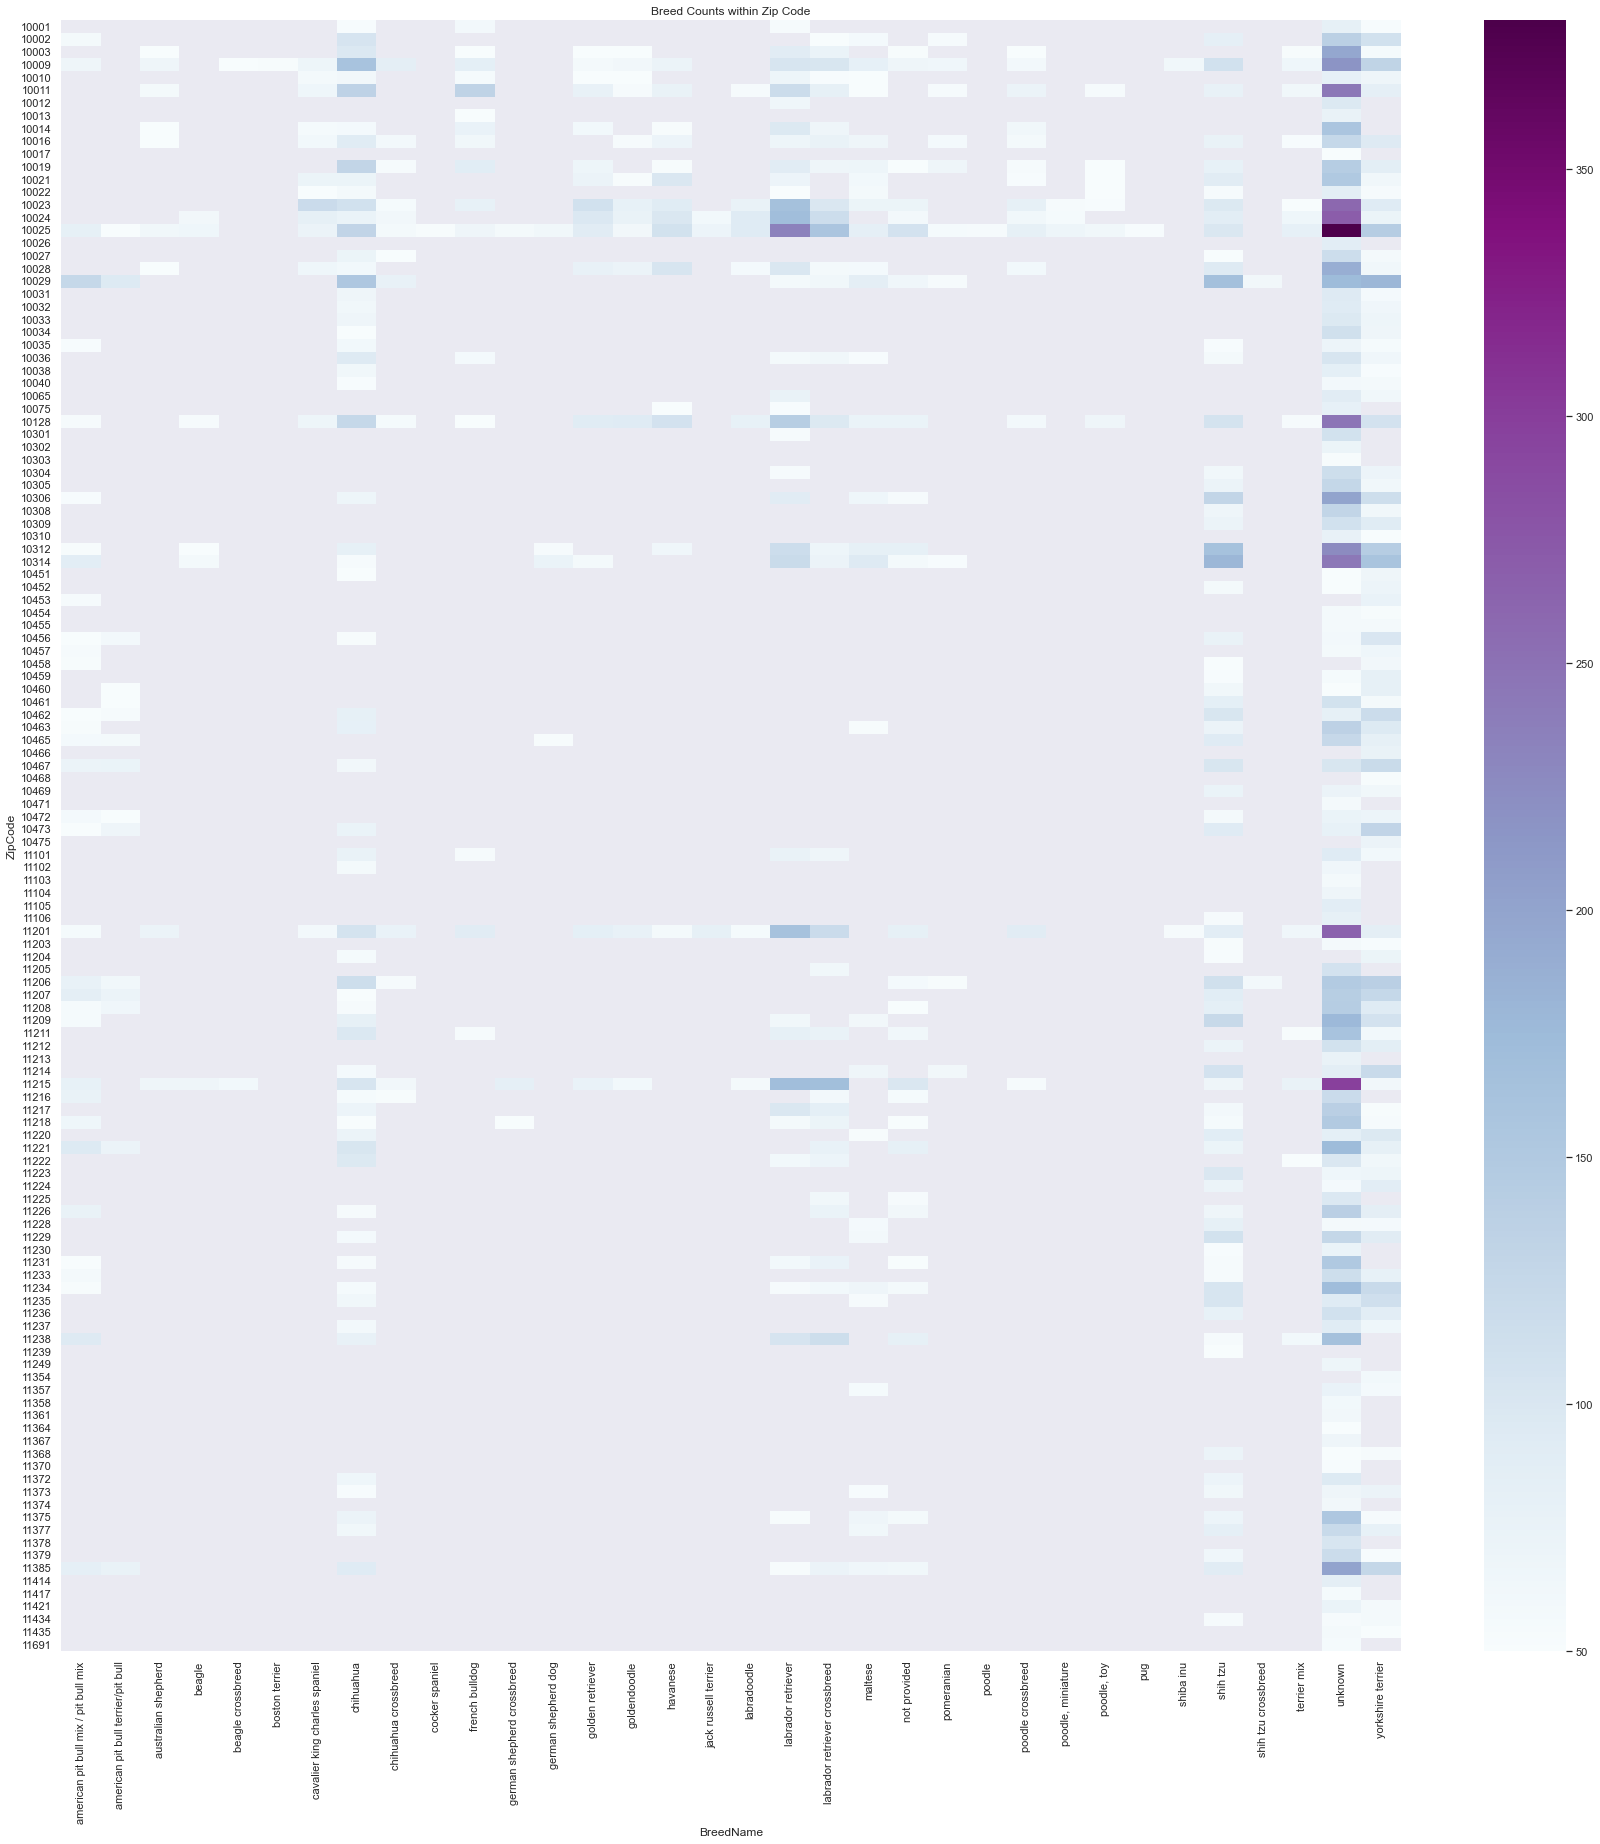

In [53]:
# count dog breed # in each ZipCode
df_dog = pd.read_csv('data/dog_info_dec_3.csv')

df_dog_zipcode_count = df_dog.copy()
zipcode_count = pd.DataFrame(df_dog_zipcode_count[['ZipCode','BreedName']].value_counts())
zipcode_count.reset_index(inplace=True)
zipcode_count.columns=['ZipCode','BreedName','counts']
df3 = pd.pivot_table(data=zipcode_count[zipcode_count['counts']>=50],
                    index='ZipCode',
                    values='counts',
                    columns='BreedName')
df3.head()

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df3,cmap="BuPu")
plt.title('Breed Counts within Zip Code')
results_path = 'export/BreedCountsWithinZipCode.png'
#print(results_path)
plt.savefig(results_path)

# GENDER

### 3.11 GENDER

In [54]:
df_dog['sex']=(df_dog['AnimalGender']=='M').astype(int)
df_dog.head()

,BreedName,AnimalName,AnimalGender,AnimalBirthYear,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Unnamed: 0,url,height,weight,longivity,sex
0,terrier crossbreed,JACK,M,2010,0,8/18/19,8/18/20,2022,NaN,NaN,NaN,NaN,NaN,1
1,bichon frise,HEDWIG,M,2021,687,11/26/21,11/26/22,2022,119.0,https://dogtime.com/dog-breeds/bichon-frise,11.0,12.0,[15],1
2,poodle crossbreed,TIGER,M,2018,923,1/11/21,2/12/26,2022,NaN,NaN,NaN,NaN,NaN,1
3,maltese,BILLIE,M,2019,1001,6/10/19,6/10/20,2022,332.0,https://dogtime.com/dog-breeds/maltese,10.0,7.0,[15],1
4,"poodle, miniature",CASH,M,2019,1002,6/26/20,6/26/21,2022,NaN,NaN,NaN,NaN,NaN,1


In [55]:
male_dog_num=df_dog['sex'].sum()
female_dog_num=len(df_dog)-df_dog['sex'].sum()
male_dog_num,female_dog_num

(117099, 95975)

Text(0.5, 1.0, 'dog gender city wide')

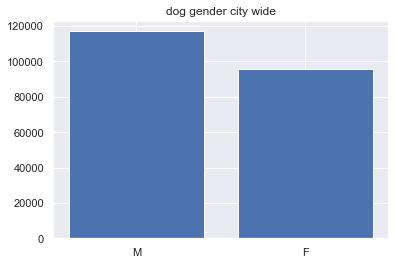

In [56]:
plt.bar(['M','F'],[male_dog_num,female_dog_num])
plt.title('dog gender city wide')

# NAME COUNT

### 3.12 Name count

In [57]:
name_count = pd.DataFrame(df_dog[['AnimalName','sex']].value_counts())
name_count.reset_index(inplace=True)

In [58]:
name_count.columns=['name','sex','counts']
name_count.head(100)

,name,sex,counts
0,MAX,1,1005
1,BELLA,0,974
2,CHARLIE,1,852
3,LUNA,0,813
4,LUCY,0,806
5,LOLA,0,806
6,ROCKY,1,778
7,UNKNOWN,1,773
8,DAISY,0,727
9,BUDDY,1,696
